# Propser Loan Data Exploration
## by (Mohammad Aamir)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
Data dictionary [in this link](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

## Data Gathering

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
loans_df= pd.read_csv('prosperLoanData.csv')

In [4]:
# high-level overview of data shape and composition
print(loans_df.shape)
print(loans_df.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [5]:
#randomly select 10 rows
loans_df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
32448,BA703594746074592292D5C,1038933,2013-11-18 12:47:29.073000000,NaN,36,Current,NaN,0.12691,0.0990,0.0890,...,-41.80,0.0,0.0,0.0,0.0,1.0,0,0,0.0,244
19954,6D0D359556124999958511D,1052732,2013-12-05 09:43:32.403000000,NaN,36,Current,NaN,0.22773,0.1905,0.1805,...,-6.73,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
92910,B62C356529688134916B362,686198,2012-12-14 10:14:55.370000000,NaN,60,Current,NaN,0.22693,0.2024,0.1924,...,-152.55,0.0,0.0,0.0,0.0,1.0,0,0,0.0,175
15496,66AB3598869356449774C76,1104326,2013-12-30 10:28:07.143000000,NaN,36,Current,NaN,0.19501,0.1585,0.1485,...,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,104
52213,FD043410155152288FD17F2,260163,2008-01-04 17:07:15.060000000,A,36,Completed,2010-07-02 00:00:00,0.08793,0.0742,0.0642,...,-58.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,247
101019,27643592964697586C9CCA5,1012749,2013-10-29 10:07:21.237000000,NaN,36,Current,NaN,0.20626,0.1695,0.1595,...,-9.86,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
36739,4EB53380262563102832465,86020,2007-01-17 17:34:40.240000000,E,36,Completed,2010-01-23 00:00:00,0.17722,0.1700,0.1650,...,-25.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,84
84953,C0D83551306197087FC1386,607980,2012-07-06 05:54:54.727000000,NaN,36,Current,NaN,0.24758,0.2099,0.1999,...,-76.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,14
6283,9CAF3504430583467FA4C8A,490352,2011-01-09 13:41:12.207000000,NaN,36,Completed,2014-01-25 00:00:00,0.35858,0.3220,0.3120,...,-133.04,0.0,0.0,0.0,0.0,1.0,0,0,0.0,75
89077,E2F4354864147932182A63A,594725,2012-05-31 11:06:39.970000000,NaN,60,Current,NaN,0.27462,0.2489,0.2389,...,-227.59,0.0,0.0,0.0,0.0,1.0,0,0,0.0,35


## Data Assessing and Cleaning

In [6]:
# selecting the interesting features
loans=  loans_df.loc[:,('CreditGrade', 'Term', 'BorrowerAPR','BorrowerRate', 'ProsperRating (Alpha)',
                       'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
                       'AmountDelinquent','LoanOriginalAmount', 'DebtToIncomeRatio', 'IncomeVerifiable','StatedMonthlyIncome',
                       'Investors','AvailableBankcardCredit','MonthlyLoanPayment')]
loans.sample(10)

,CreditGrade,Term,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatusDuration,IsBorrowerHomeowner,AmountDelinquent,LoanOriginalAmount,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,Investors,AvailableBankcardCredit,MonthlyLoanPayment
68243,HR,36,0.29210,0.2800,NaN,1,MO,31.0,False,3651.0,4800,0.30,True,1762.666667,52,22.0,179.17
10793,NaN,36,0.15833,0.1299,A,1,CA,119.0,False,0.0,35000,0.25,True,9250.000000,1,16564.0,1179.12
693,NaN,36,0.12528,0.0974,A,7,OH,119.0,True,0.0,2600,0.32,True,3666.666667,48,143807.0,83.58
59107,NaN,36,0.17322,0.1515,B,1,WV,301.0,True,0.0,7500,0.14,True,6000.000000,205,5969.0,260.54
37981,NaN,36,0.25486,0.2205,C,1,AR,6.0,True,0.0,15000,NaN,False,10416.666667,50,8431.0,573.24
19668,NaN,60,0.15629,0.1334,A,2,GA,32.0,True,0.0,9000,0.15,True,4666.666667,144,3361.0,206.35
77722,NaN,36,0.25259,0.2148,C,1,MA,60.0,False,0.0,5000,0.28,True,8833.333333,74,31997.0,189.61
50361,NaN,60,0.23267,0.2080,D,19,PA,36.0,False,0.0,4000,0.22,True,1750.000000,1,160.0,107.76
82275,NaN,36,0.30899,0.2699,E,1,AZ,0.0,False,0.0,4000,0.22,True,3741.000000,1,382.0,163.28
67817,C,36,0.17601,0.1688,NaN,4,IN,335.0,True,0.0,3000,0.22,True,4916.666667,89,432.0,106.78


In [7]:
loans.describe()

,Term,BorrowerAPR,BorrowerRate,ListingCategory (numeric),EmploymentStatusDuration,AmountDelinquent,LoanOriginalAmount,DebtToIncomeRatio,StatedMonthlyIncome,Investors,AvailableBankcardCredit,MonthlyLoanPayment
count,113937.000000,113912.000000,113937.000000,113937.000000,106312.000000,106315.000000,113937.00000,105383.000000,1.139370e+05,113937.000000,106393.000000,113937.000000
mean,40.830248,0.218828,0.192764,2.774209,96.071582,984.507059,8337.01385,0.275947,5.608026e+03,80.475228,11210.225447,272.475783
std,10.436212,0.080364,0.074818,3.996797,94.480605,7158.270157,6245.80058,0.551759,7.478497e+03,103.239020,19818.361309,192.697812
min,12.000000,0.006530,0.000000,0.000000,0.000000,0.000000,1000.00000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,36.000000,0.156290,0.134000,1.000000,26.000000,0.000000,4000.00000,0.140000,3.200333e+03,2.000000,880.000000,131.620000
50%,36.000000,0.209760,0.184000,1.000000,67.000000,0.000000,6500.00000,0.220000,4.666667e+03,44.000000,4100.000000,217.740000
75%,36.000000,0.283810,0.250000,3.000000,137.000000,0.000000,12000.00000,0.320000,6.825000e+03,115.000000,13180.000000,371.580000
max,60.000000,0.512290,0.497500,20.000000,755.000000,463881.000000,35000.00000,10.010000,1.750003e+06,1189.000000,646285.000000,2251.510000


In [8]:
#Make a copy of the data frame
loans_clean = loans.copy()

From the feature descriptions, it looks like Prosper transitioned to a "Prosper Rating" after 2009 to differentiate themselves from the industry standard "Credit Grade.

For exploratory purposes, we'll replace the Credit Grade of No Credit (NC) with High Risk (HR) and combine this column with the Prosper Rating.

In the future we may want to look at estimated returns of the pre-2009 "Credit Grade" to see how it compares with the post-2009 "Prosper Rating" to validate if they truly are equivalent or if Prosper skewed their credit rating in some way.

In [9]:
loans_clean.CreditGrade.value_counts(), loans_clean['ProsperRating (Alpha)'].value_counts()

(C     5649
 D     5153
 B     4389
 AA    3509
 HR    3508
 A     3315
 E     3289
 NC     141
 Name: CreditGrade, dtype: int64,
 C     18345
 B     15581
 A     14551
 D     14274
 E      9795
 HR     6935
 AA     5372
 Name: ProsperRating (Alpha), dtype: int64)

In [10]:
# fill NA with empty strings
loans_clean['ProsperRating (Alpha)'].fillna("", inplace= True)
loans_clean.CreditGrade.fillna("", inplace= True)

# combine credit ratings
loans_clean['Com_ProsperRating']= loans_clean.CreditGrade+ loans_clean['ProsperRating (Alpha)']

# drop rows with no credit ratings
loans_clean= loans_clean.query('Com_ProsperRating != "" & Com_ProsperRating != "NC"')

# drop unnecessary columns
loans_clean.drop(columns= ['ProsperRating (Alpha)', 'CreditGrade'], inplace= True)   

# check values
loans_clean['Com_ProsperRating'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
Name: Com_ProsperRating, dtype: int64

In [11]:
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113665 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113665 non-null  int64  
 1   BorrowerAPR                113641 non-null  float64
 2   BorrowerRate               113665 non-null  float64
 3   ListingCategory (numeric)  113665 non-null  int64  
 4   BorrowerState              108204 non-null  object 
 5   EmploymentStatusDuration   106181 non-null  float64
 6   IsBorrowerHomeowner        113665 non-null  bool   
 7   AmountDelinquent           106184 non-null  float64
 8   LoanOriginalAmount         113665 non-null  int64  
 9   DebtToIncomeRatio          105183 non-null  float64
 10  IncomeVerifiable           113665 non-null  bool   
 11  StatedMonthlyIncome        113665 non-null  float64
 12  Investors                  113665 non-null  int64  
 13  AvailableBankcardCredit    10

In [12]:
# selecting rows only where ProsperRating is not null as this is one of the most important features of the dataset 
# and filling in missing values is not possible.
loans_clean = loans_clean[loans_clean['AmountDelinquent'].notnull()]
loans_clean = loans_clean[loans_clean['BorrowerState'].notnull()]


In [13]:
# filling in missing quantitative values as mean of the columns

loans_clean.BorrowerAPR.fillna(loans_clean.BorrowerAPR.mean(), inplace= True)
loans_clean.EmploymentStatusDuration.fillna(loans_clean.EmploymentStatusDuration.mean(), inplace= True)
loans_clean.DebtToIncomeRatio.fillna(loans_clean.DebtToIncomeRatio.mean(), inplace= True)
loans_clean.AvailableBankcardCredit.fillna(loans_clean.AvailableBankcardCredit.mean(), inplace= True)


In [14]:
#Replace listing category number by name
lits_cat_name= {0:  'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',\
                5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',\
                11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',\
                15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loans_clean['ListingCategory (numeric)']= loans_clean['ListingCategory (numeric)'].map(lits_cat_name)
loans_clean= loans_clean.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})

In [15]:
# Convert ProsperRating to ordinal categorical 
ordinal_var_dict= {'Com_ProsperRating': ['HR','E','D','C', 'B', 'A', 'AA']}
for var in ordinal_var_dict:
    ordered_var= pd.api.types.CategoricalDtype(ordered= True, categories= ordinal_var_dict[var])
    loans_clean[var]= loans_clean[var].astype(ordered_var)

#Adjust datatype for all other categorical columns
loans_clean.BorrowerState= loans_clean.BorrowerState.astype('category')
loans_clean.ListingCategory = loans_clean.ListingCategory.astype('category')

## Exploratory Data Analysis

In [16]:
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104447 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Term                      104447 non-null  int64   
 1   BorrowerAPR               104447 non-null  float64 
 2   BorrowerRate              104447 non-null  float64 
 3   ListingCategory           104447 non-null  category
 4   BorrowerState             104447 non-null  category
 5   EmploymentStatusDuration  104447 non-null  float64 
 6   IsBorrowerHomeowner       104447 non-null  bool    
 7   AmountDelinquent          104447 non-null  float64 
 8   LoanOriginalAmount        104447 non-null  int64   
 9   DebtToIncomeRatio         104447 non-null  float64 
 10  IncomeVerifiable          104447 non-null  bool    
 11  StatedMonthlyIncome       104447 non-null  float64 
 12  Investors                 104447 non-null  int64   
 13  AvailableBankcardCredit   104

In [17]:
loans_clean.sample(10)

,Term,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,EmploymentStatusDuration,IsBorrowerHomeowner,AmountDelinquent,LoanOriginalAmount,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,Investors,AvailableBankcardCredit,MonthlyLoanPayment,Com_ProsperRating
35714,36,0.24758,0.2099,Business,IL,88.0,False,0.0,15000,0.271972,False,1666.666667,62,12044.0,565.05,C
83002,36,0.09620,0.0824,Home Improvement,NY,42.0,True,0.0,4500,0.170000,True,6666.666667,209,39551.0,141.51,A
69538,36,0.22872,0.1949,Debt Consolidation,CO,126.0,False,0.0,5000,0.200000,True,1791.666667,83,13900.0,184.52,C
50451,36,0.12392,0.1099,Debt Consolidation,AL,10.0,True,666.0,2500,0.140000,True,4666.666667,122,1331.0,0.00,A
94179,36,0.37453,0.3500,Other,IN,88.0,False,123.0,1000,0.030000,True,2000.000000,12,39.0,45.24,HR
50394,36,0.35797,0.3177,Debt Consolidation,TX,100.0,True,3561.0,4000,0.240000,True,7916.666667,22,4657.0,173.71,HR
11962,36,0.13674,0.1297,Not Available,GA,13.0,True,0.0,5000,0.710000,True,3000.000000,205,28782.0,168.40,B
19384,60,0.15016,0.1274,Debt Consolidation,OR,48.0,True,0.0,10500,0.090000,True,4416.666667,1,6777.0,237.51,B
23275,36,0.08577,0.0724,Debt Consolidation,WI,163.0,True,0.0,4000,0.070000,True,6666.666667,81,19016.0,123.95,AA
86889,36,0.19386,0.1570,Debt Consolidation,MD,301.0,True,0.0,2000,0.040000,True,6500.000000,1,28.0,70.02,C


### What is the structure of your dataset?

> The dataset contains 104447 loans with 14 features, Most variables are numeric in nature, but the variables (ProsperRating (Alpha), ListingCategory and BorrowerState) are categorical and datetime variable (ListingCreationDate).

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figureing out what features are best for predicting the borrower's Annual Percentage Rate (`BorrowerAPR`) and interest reate (` BorrowerRate`) for the loan. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the following features will have a strong effect on APR:
- `Com_ProsperRating`: The Prosper Rating assigned between AA(higher) - HR(lower) A higher rate qualifies you for the lowest interest rates.
- `LoanOriginalAmount`: Large loan amount, higher interest rate and APR will be.
- `Term`: Typically, the longer the loan term, the higher the interest rate will be (but not always). That’s because shorter terms guarantee the lender will have their money back sooner, so there’s less risk.

## Univariate Exploration

> To begin with, we look at the distribution for `BorrowerAPR` and `BorrowerRate`. there are continuous variables, hence a histogram will be suitable choice. First, it helps to look at some descriptive statistics for them.

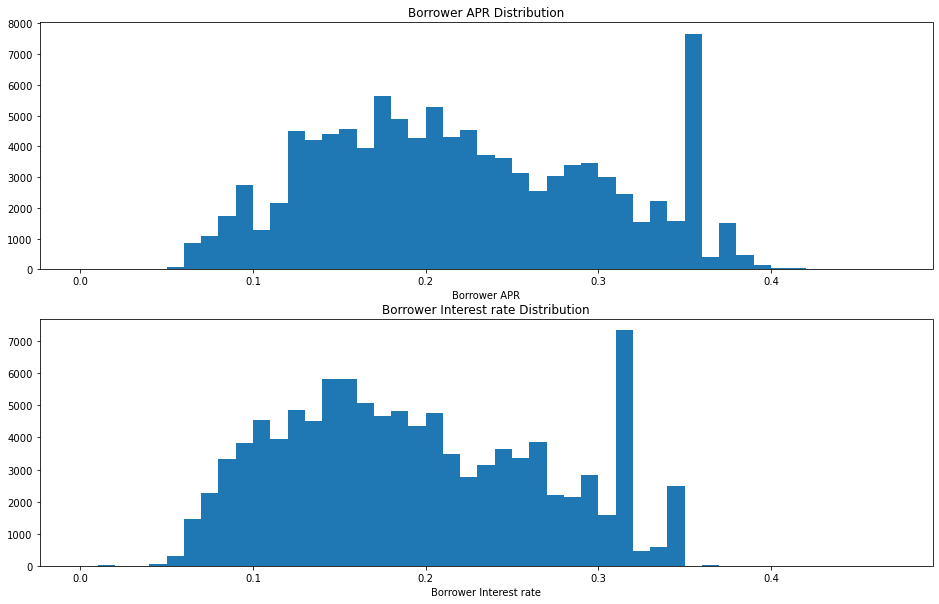

In [18]:
# let's Two main faetures together.
bins= np.arange(0, loans_clean.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[16, 10])

plt.subplot(2, 1, 1)
plt.hist(data= loans_clean, x= 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('Borrower APR Distribution')

plt.subplot(2, 1, 2)
plt.hist(data= loans_clean, x= 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Interest rate');
plt.title('Borrower Interest rate Distribution');


- We see that the Borrower APR and Borrower Interest rate are normally distrubuted with the peak between 13 and 23 percent in addition we have some increase in the 35 percent.

- We notice a great deal of interaction between Borrower APR and Borrower Interest rate, so we can ignore one of them in our analysis.

Next, we look at some variables, which are likely to affect the `BorrowerAPR` i.e. `Com_ProsperRating`, `Term`, and `LoanOriginalAmount`. We begin with `Com_ProsperRating` and`Term`. Since there are a categorical variable, it will be beneficial to look at the bar graph.

In [19]:
base_color = sb.color_palette()[0]

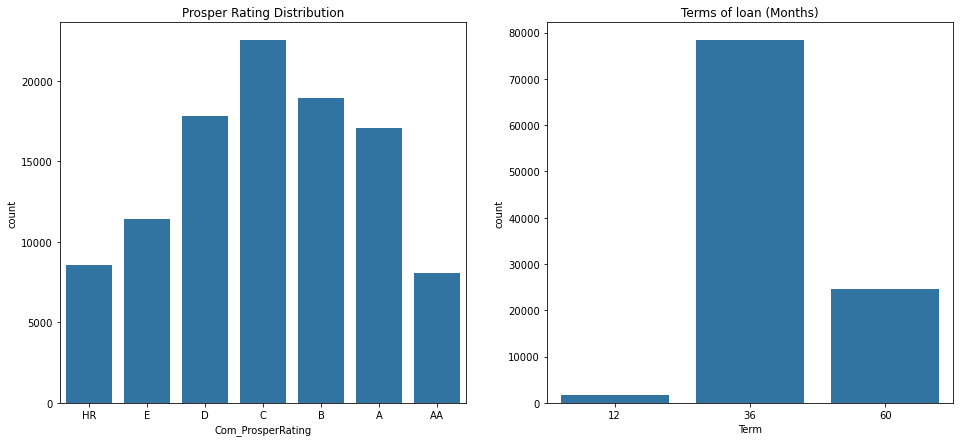

In [20]:
fig, ax = plt.subplots(ncols=2, figsize = [16,7])


sb.countplot(data=loans_clean, x='Com_ProsperRating', color=base_color, ax= ax[0]).set(title='Prosper Rating Distribution')

sb.countplot(data=loans_clean, x='Term', color=base_color, ax= ax[1]).set(title='Terms of loan (Months)')

plt.show()

- The length of most of the loans are 36 months.
- The ratings of most of the borrowers are among D to A. 

Text(0.5, 1.0, 'Loan Amount Distribution')

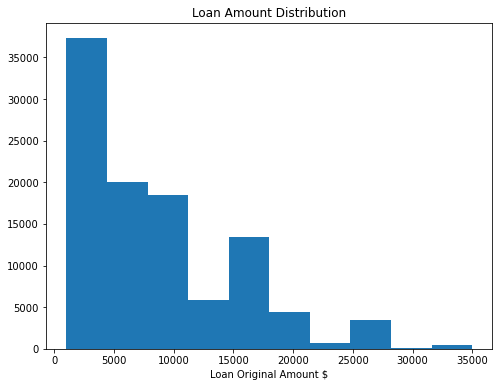

In [21]:
# Loan ammount distribution
plt.figure(figsize=[8, 6])
plt.hist(data= loans_clean, x= 'LoanOriginalAmount');
plt.xlabel('Loan Original Amount $');
plt.title('Loan Amount Distribution')

- The distribution of loan amount looks highly right skewed I will apply a logarithmic transform to the data to follow a normal distribution. here we will try log scale

In [22]:
np.log10(loans_clean['LoanOriginalAmount'].describe())

count    5.018896
mean     3.934812
std      3.797571
min      3.000000
25%      3.602060
50%      3.845098
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

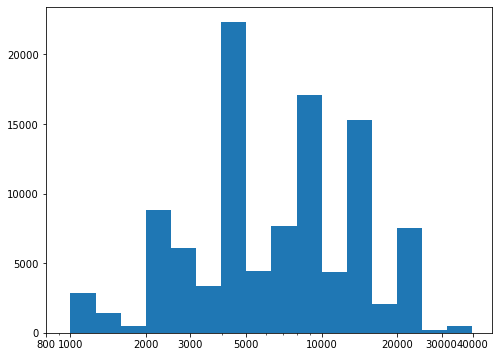

In [23]:
# Scale the x-axis to log-type, change the axis limits, and increase the x-ticks
plt.figure(figsize=[8, 6])

# Axis transformation
# Bin size
bins = 10 ** np.arange(3, 4.6+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [800, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 40000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=loans_clean, x='LoanOriginalAmount', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')    #Try to remove this line

# Apply x-ticks
plt.xticks(ticks, labels);

- The highest value for original loan amount is from 4K and 5K. Also I notice increase in amount between 8K and 10K 

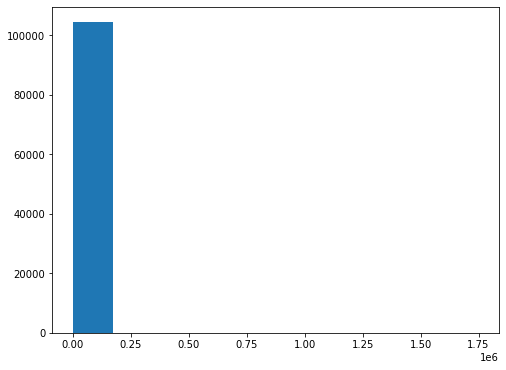

In [24]:
# Monthly income distribution
plt.figure(figsize=[8, 6])
plt.hist(data=loans_clean, x='StatedMonthlyIncome');

- The distribution of stated monthly income is severely right screwed and the distribution isn't obvios It seems that the value of outlier is very high. So it's better to remove outliers to get a clear insight.

In [25]:
# Getting the lowest and highest value

Q1 = loans_clean['StatedMonthlyIncome'].quantile(0.25)
Q3 = loans_clean['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

fence_low  = Q1-1.5*IQR
fence_high = Q3+1.5*IQR

loans_clean.shape

(104447, 16)

In [26]:
# cheking the percentage of outliers
((loans_clean.StatedMonthlyIncome>fence_high).sum()+(loans_clean.StatedMonthlyIncome<fence_low).sum())/float(loans_clean.shape[0])

0.05077216195773933

Outliers is less than 30% so it is better to remove (General rule).

In [27]:
loans_clean = loans_clean.loc[(loans_clean['StatedMonthlyIncome'] > fence_low) & (loans_clean['StatedMonthlyIncome'] < fence_high)]
loans_clean.shape

(99144, 16)

Text(0.5, 1.0, 'MonthlyIncome Distribution')

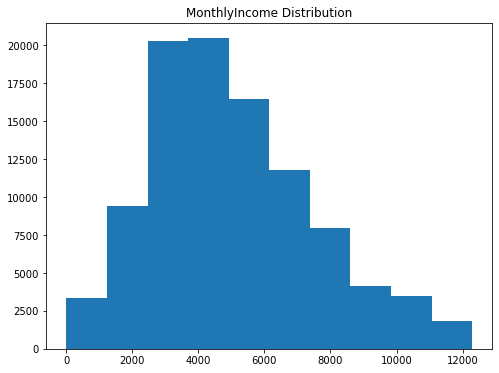

In [28]:
# Monthly income distribution After removing outliers
plt.figure(figsize=[8, 6])
plt.hist(data=loans_clean, x='StatedMonthlyIncome');
plt.title('MonthlyIncome Distribution')

- Most borrowers have stated monthly income between 3200 and 6500 dollars. 

Text(0.5, 1.0, 'Location')

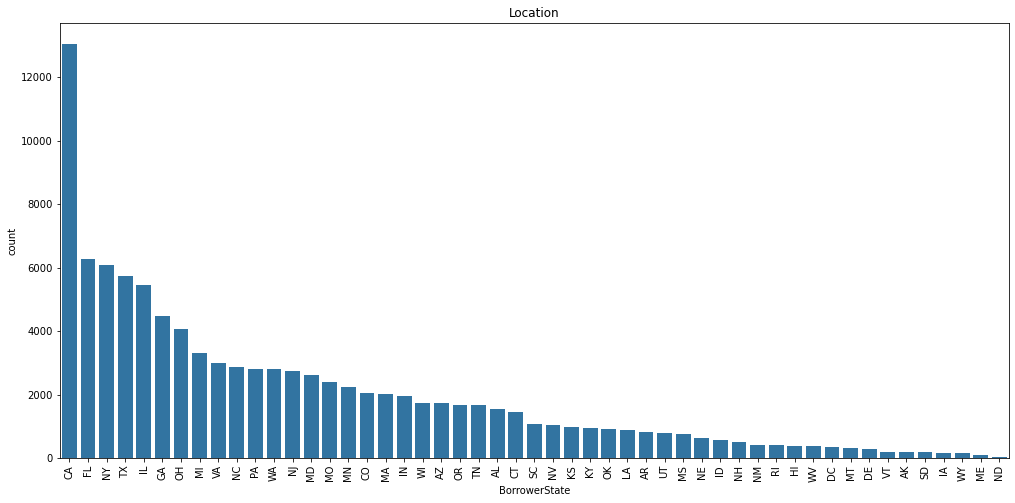

In [29]:
# Plot the Borrower State on a Horizontal bar chart
plt.figure(figsize=[17, 8])
State_order= loans_clean['BorrowerState'].value_counts().index
sb.countplot(data=loans_clean, x='BorrowerState', color=base_color, order=State_order);
plt.xticks(rotation=90);
plt.title('Location')

- We can see that California (CA), Texas (TX) and New York (NY) have the 3 biggest numbers of loans originated in that period of time.

Text(0.5, 1.0, 'Listing Category Distribution')

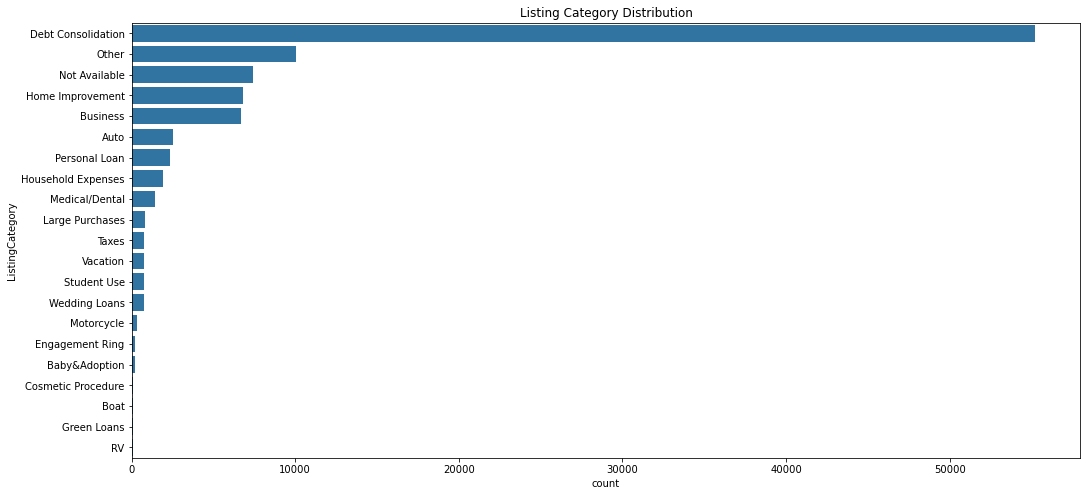

In [30]:
# Plot the Listing Category on a Horizontal bar chart
plt.figure(figsize=[17, 8])
List_order= loans_clean['ListingCategory'].value_counts().index
sb.countplot(data=loans_clean,y='ListingCategory',color=base_color, order= List_order);
plt.title('Listing Category Distribution')

- Most people took loans to reimburse loans/debts and lenders also issued loans to these people.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR & interest rate looks multimodal, and NO need to split chart, There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of `LoanOriginalAmount` is  highly right skewed it took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked multimodal. 
> The distributions of `StatedMonthlyIncome` is  highly right skewed and unclear, it took on a large range of values located on the far left. so I looked at the data after removing the outliers, the data looked normal distributed.



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> A correlarion grid a a great way to check the correlarion/relationship of multiple variables


In [31]:
cat_vars= ['Term','IsBorrowerHomeowner', 'Com_ProsperRating', 'IncomeVerifiable']
num_vars= ['BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration', 'AmountDelinquent',
           'DebtToIncomeRatio','LoanOriginalAmount' ,'StatedMonthlyIncome', 'AvailableBankcardCredit', 'Investors','MonthlyLoanPayment']

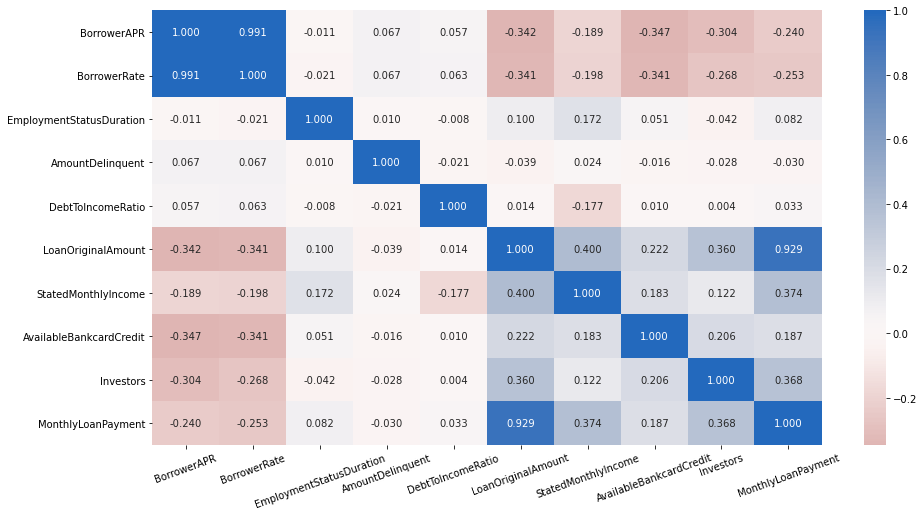

In [32]:
# correlation plot
plt.figure(figsize = [15, 8])
sb.heatmap(loans_clean[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.xticks(rotation=20);
plt.show()

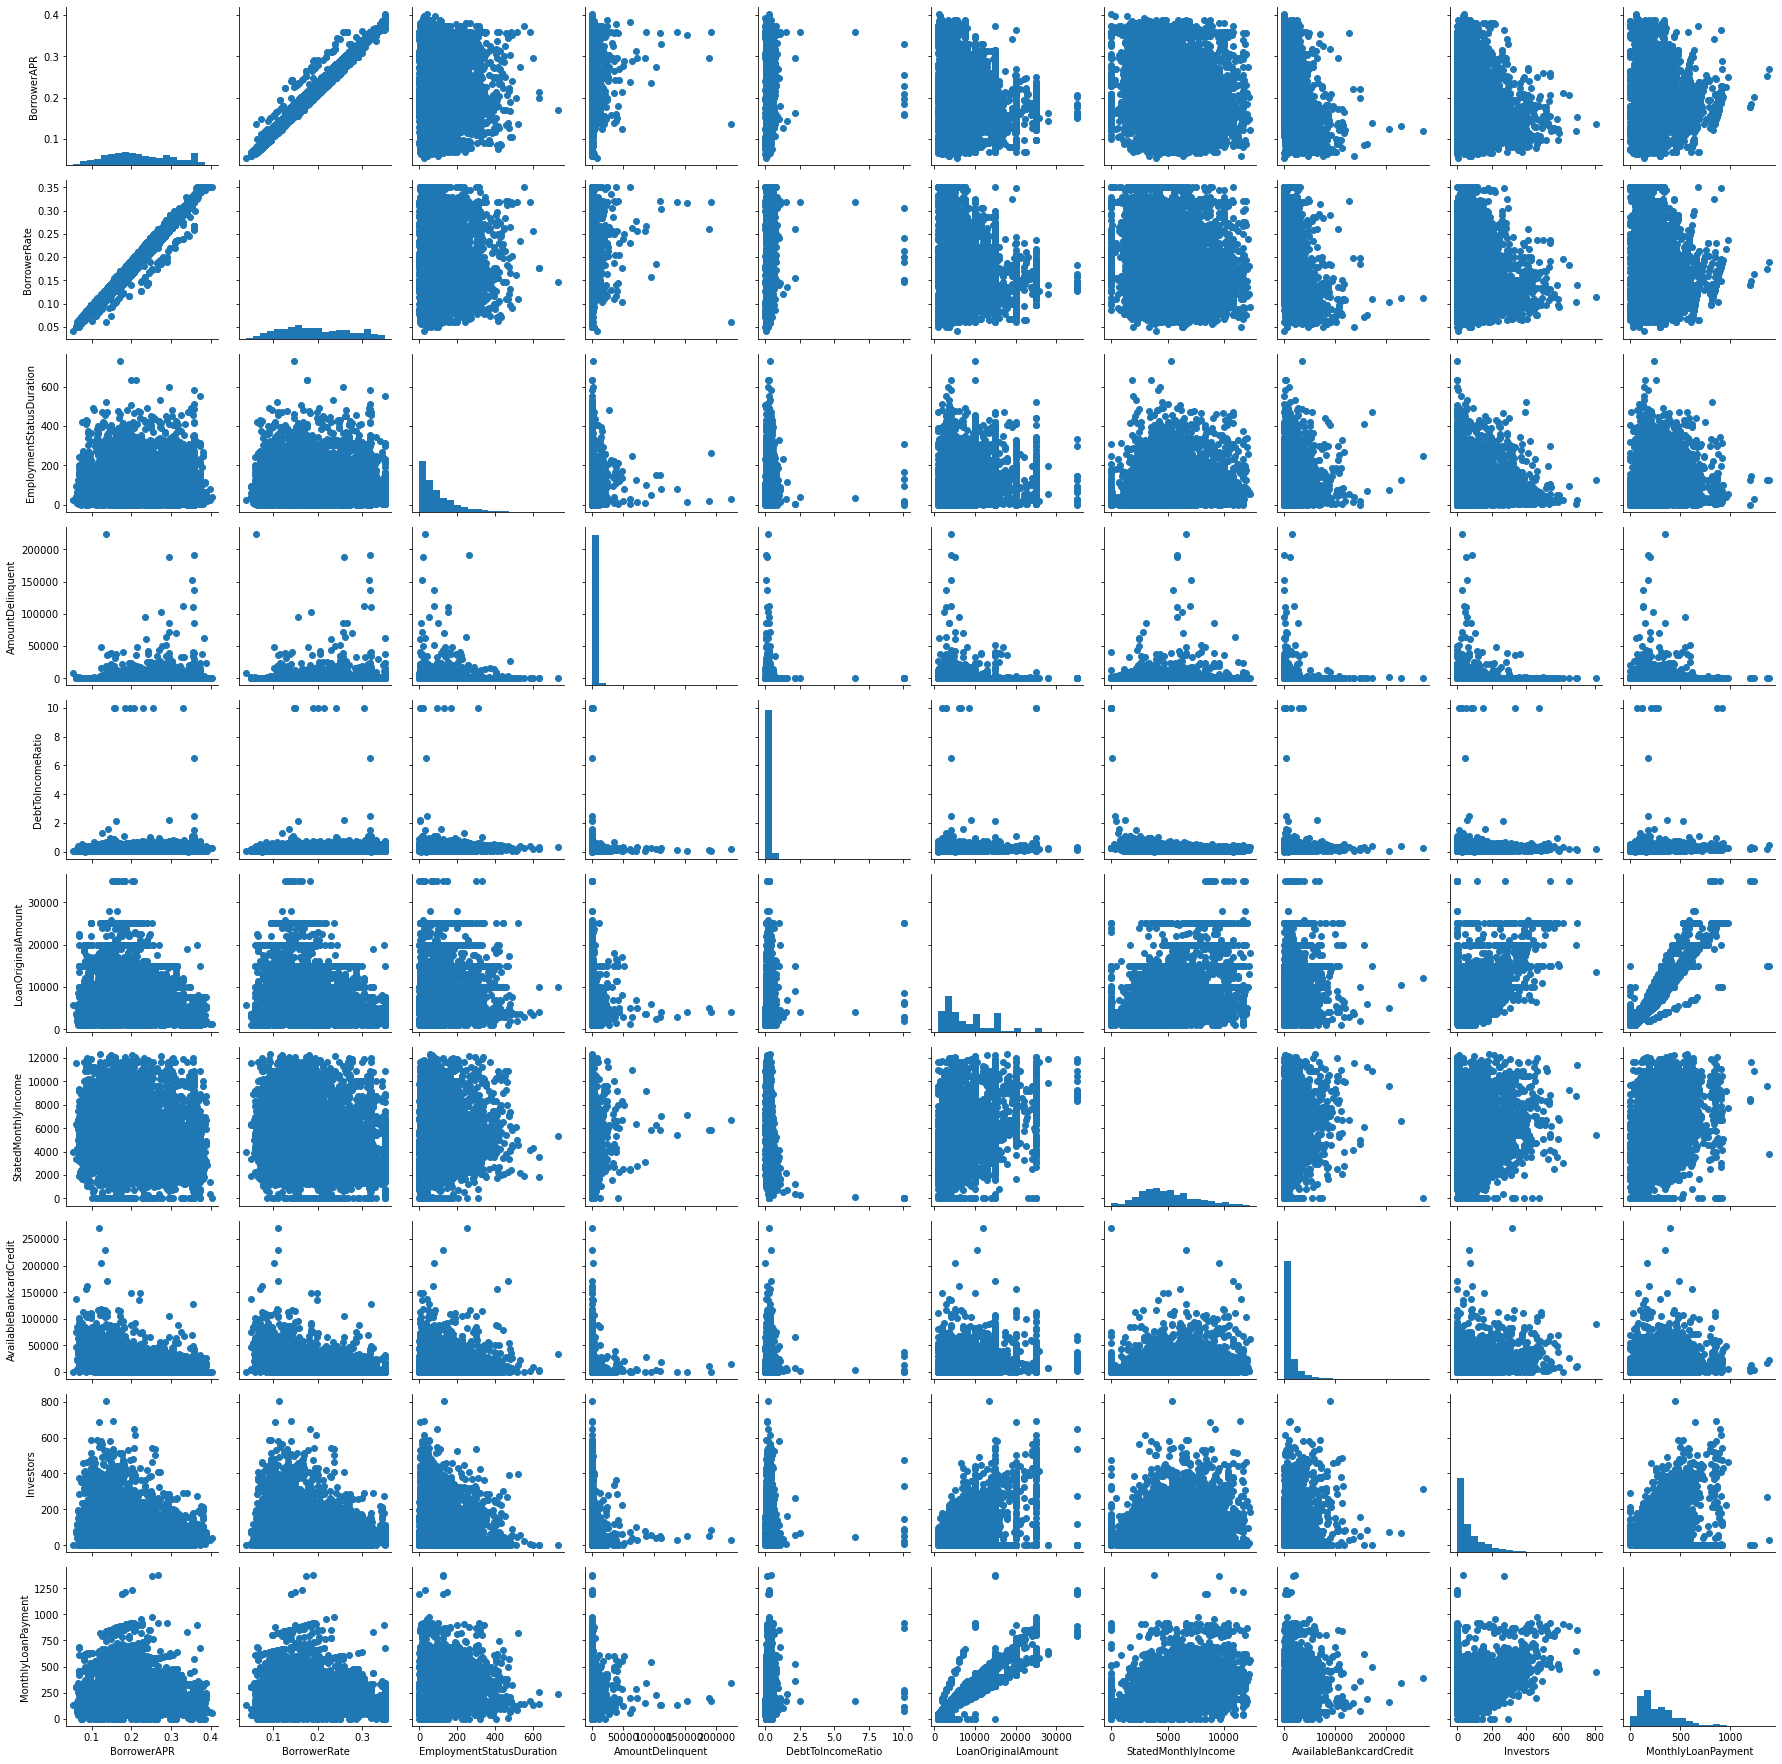

In [33]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
loans_samp = loans_clean.sample(5000)

g = sb.PairGrid(data = loans_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);


> Based on the correlation matrix and the scatter plots above, there are some relations of interest:

- Strong positive correlations between `LoanOriginalAmount` and `MonthlyLoanPayment` and this makes sense, the higher loan ammount the hier monthly payment.
- Negative correlation between `LoanOriginalAmount` and `BrowerAPR` which agrees with our hypothesis, that is the more the loan amount, the lower the APR.
- Negative realationship between `AvailableBankcardCredit` and `BrowerAPR`, also with `BrowerAPR` and `Investors`. this is also logic, more availaple credit cards means more loan ammount and large number of investors which whish affect negatively in brower APR.   


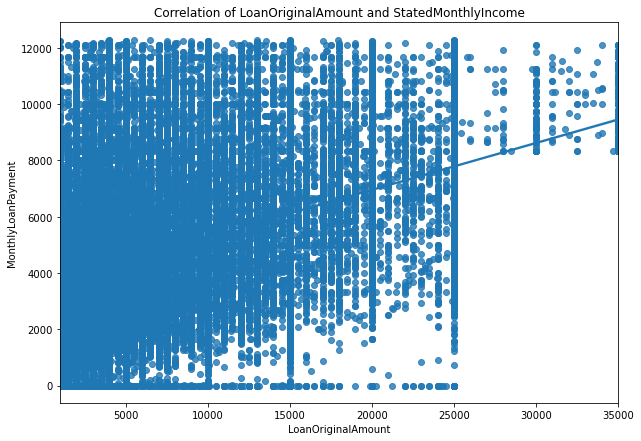

In [34]:
#Correlation of LoanOriginalAmount and StatedMonthlyIncome
plt.figure(figsize = [10, 7])
sb.regplot(data = loans_clean, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome');
plt.xlabel('LoanOriginalAmount')
plt.ylabel('MonthlyLoanPayment')
plt.title('Correlation of LoanOriginalAmount and StatedMonthlyIncome');

- ther is apositive linear realtionship between loan original amount stated monthly income, it makes sense since borrowers with more monthly income could loan more money.

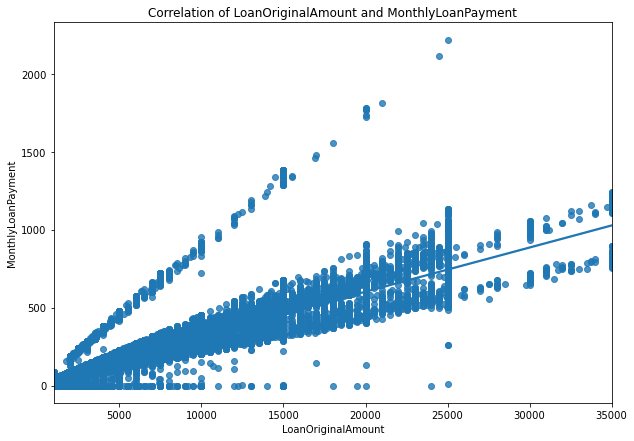

In [35]:
#Correlation of LoanOriginalAmount and MonthlyLoanPayment
plt.figure(figsize = [10, 7])
sb.regplot(data = loans_clean, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment');
plt.xlabel('LoanOriginalAmount')
plt.ylabel('MonthlyLoanPayment')
plt.title('Correlation of LoanOriginalAmount and MonthlyLoanPayment');

- As we can see a strong linear realtionship here, LoanOriginalAmount & MonthlyLoanPayment has positive slope which is obvious because if these two increase

Let's move on to looking at how APR and loan ammount correlate with the categorical variables.

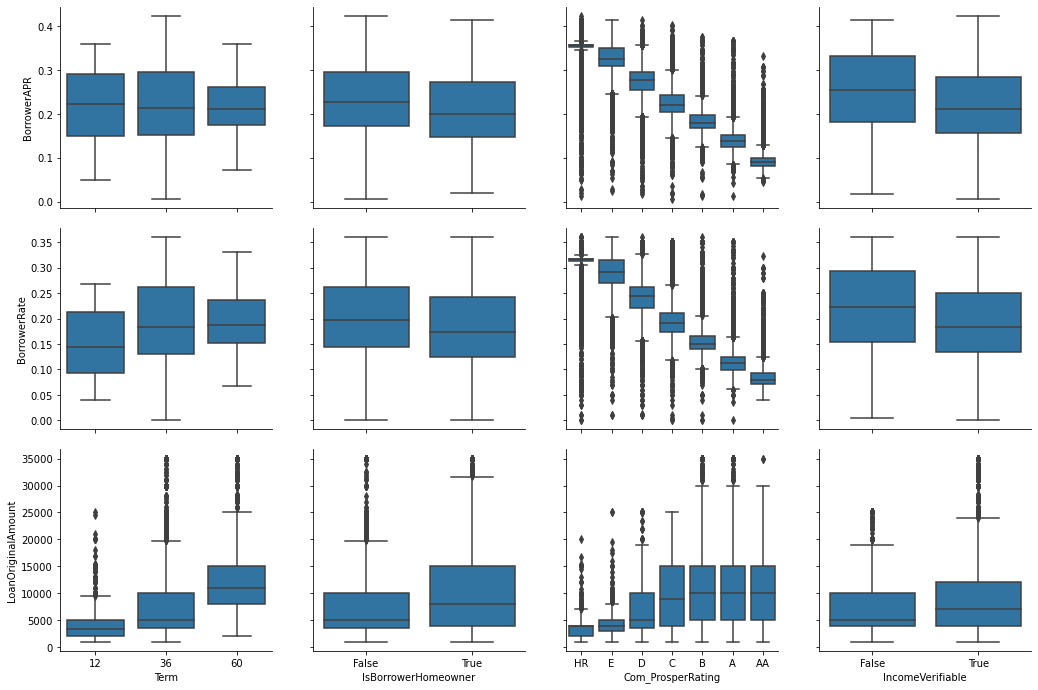

In [39]:
# plot matrix of numeric features against categorical features.

g = sb.PairGrid(data = loans_clean, x_vars =cat_vars, y_vars = ['BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount'])
g.map(sb.boxplot,  color = base_color);
g.fig.set_size_inches(15,10)

- the interest rate shows a declining treand visible from the black points. This indeed proves that the lenders like to charge less from borrowers with better prosper rating also from home owners and there income is variable.
- Loan original amount increases to higher prosper rating also increase for home owners and there income is variable. 
- interest rate and Loan original amount increases with term on loan.

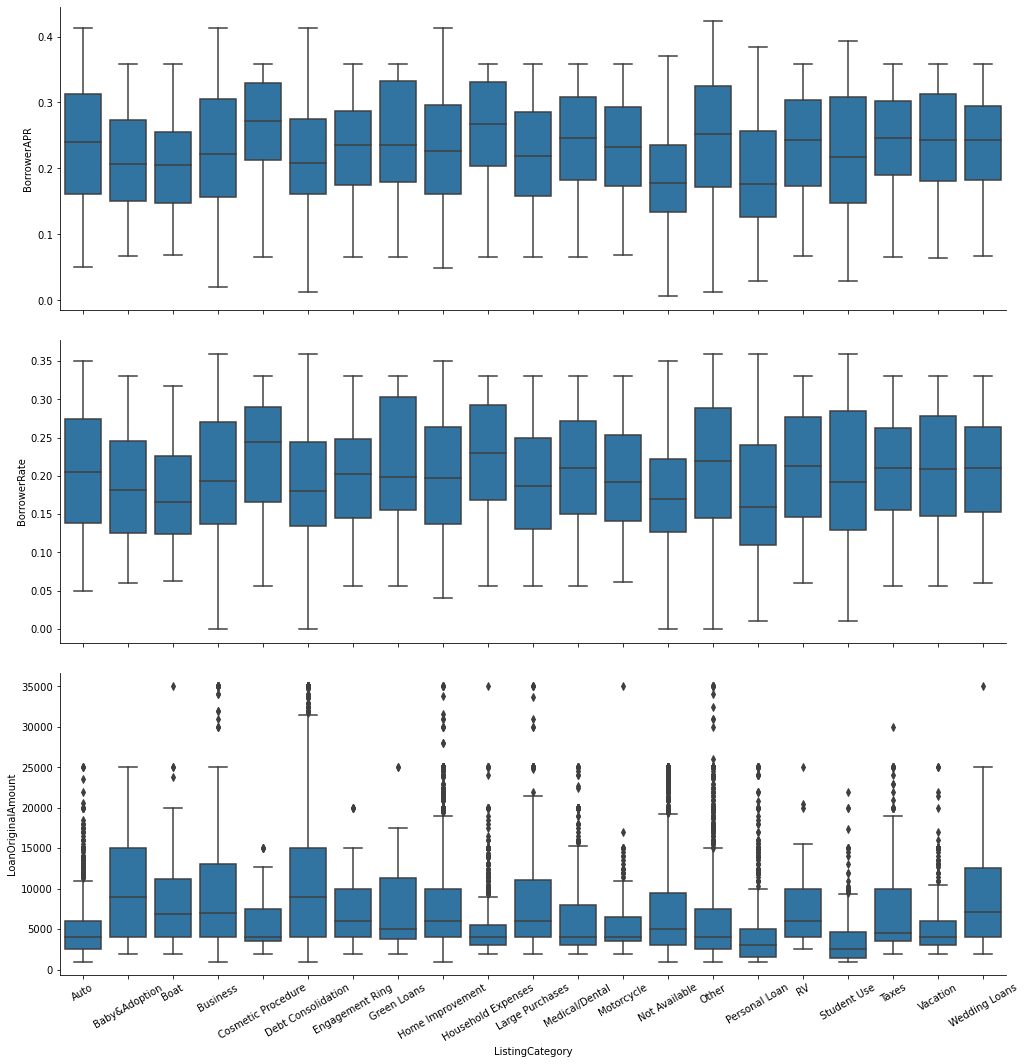

In [40]:
g = sb.PairGrid(data = loans_clean, x_vars ='ListingCategory', y_vars = ['BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount'])
g.map(sb.boxplot,  color = base_color);
g.fig.set_size_inches(20,15)
plt.xticks(rotation=30);



- It is noticed that mostly Home improvement and Cosmetic Procedure are given higer interest rates and APR

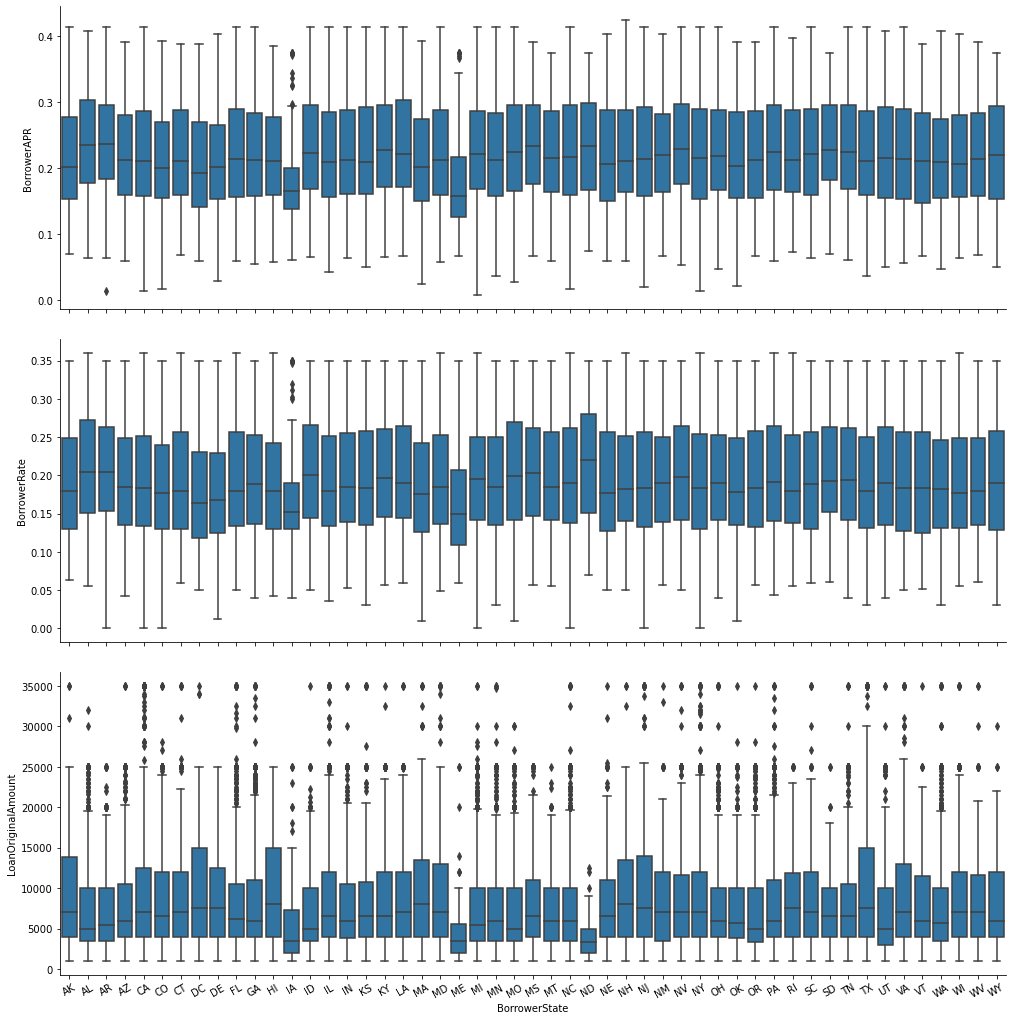

In [41]:
g = sb.PairGrid(data = loans_clean, x_vars ='BorrowerState', y_vars = ['BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount'])
g.map(sb.boxplot,  color = base_color);
g.fig.set_size_inches(20,15)
plt.xticks(rotation=30);


- It is noticed that mostly IA and ME stats  are given lower interest rates and APR

Finally, let's look at relationships between the three categorical features.

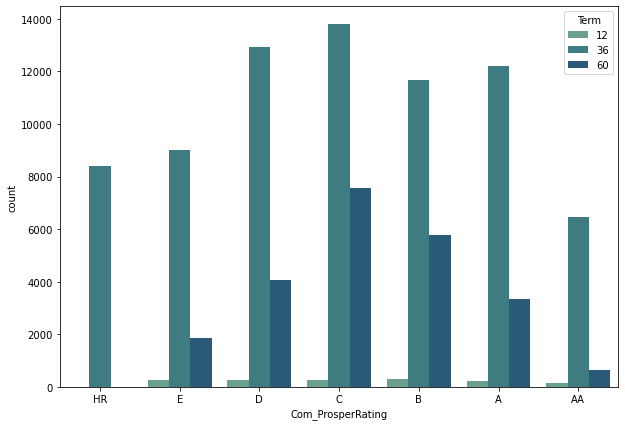

In [42]:
# subplot 1: Prosper rating vs term

plt.figure(figsize= [10, 7])
sb.countplot(data= loans_clean, x= 'Com_ProsperRating', hue= 'Term', palette= 'crest');

- we can see that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on C and B ratings. There is only 36 months loans for HR rating borrowers.

In [45]:
# setting the mean for 3 terms
grouped_df = loans_clean.groupby("Term")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
mean_df

,Term,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,IsBorrowerHomeowner,AmountDelinquent,LoanOriginalAmount,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,Investors,AvailableBankcardCredit,MonthlyLoanPayment
0,12,0.217661,0.151015,85.338275,0.416442,1379.278302,4398.582884,0.232930,0.877358,5511.220182,61.287062,16570.778302,361.274124
1,36,0.223864,0.195875,91.905493,0.485728,1011.955309,7202.975042,0.283084,0.913386,4835.637633,81.725045,10203.462895,256.869800
2,60,0.218069,0.194168,110.457189,0.574542,770.295025,12025.010726,0.262554,0.943356,5497.362230,68.237777,11708.794572,307.450560


In [46]:
# setting the mean for all prosper ratings

grouped_df2 = loans_clean.groupby("Com_ProsperRating")
mean_df2 = grouped_df2.mean()
mean_df2 = mean_df2.reset_index()
mean_df2

,Com_ProsperRating,Term,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,IsBorrowerHomeowner,AmountDelinquent,LoanOriginalAmount,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,Investors,AvailableBankcardCredit,MonthlyLoanPayment
0,HR,36.000000,0.343126,0.308137,85.771045,0.429558,1930.143861,3239.413481,0.346808,0.856020,3973.988369,34.704776,3499.688103,137.653042
1,E,39.412261,0.324686,0.290093,92.486491,0.397630,1515.359663,4340.830446,0.290589,0.894264,4448.276247,36.959519,3727.161835,175.636429
2,D,41.256825,0.270910,0.240449,91.408795,0.413551,1239.696459,6496.794355,0.287360,0.912247,4512.891299,62.339014,5241.959022,234.261042
3,C,44.127508,0.221072,0.192390,99.498878,0.498355,839.210536,9340.117546,0.286284,0.929852,5013.959382,62.802854,7357.119873,299.450725
4,B,43.414172,0.181329,0.154988,101.310811,0.540109,647.741643,10600.842945,0.268171,0.935848,5356.888010,88.187947,11003.734652,323.271802
5,A,40.719443,0.138983,0.115280,100.331580,0.592464,604.273084,10666.586320,0.243045,0.940152,5599.764123,109.970678,17888.264598,323.284801
6,AA,37.571054,0.096106,0.086155,93.391837,0.725314,226.667035,10523.456705,0.225653,0.938268,5985.060305,182.863831,35660.422732,323.117458


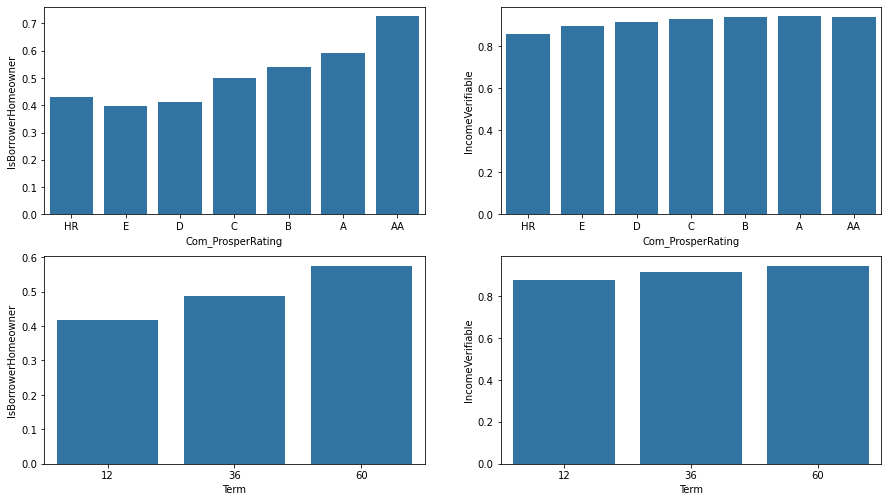

In [47]:
plt.figure(figsize = [15, 13])

# subplot 2: employment status vs. term
ax = plt.subplot(3, 2, 1)
sb.barplot(data=mean_df2, x='Com_ProsperRating', y='IsBorrowerHomeowner', color=base_color)

# subplot 3: Prosper rating vs. employment status
ax = plt.subplot(3, 2, 2)
sb.barplot(data=mean_df2, x='Com_ProsperRating', y='IncomeVerifiable', color=base_color)



ax = plt.subplot(3, 2, 3)
sb.barplot(data=mean_df, x='Term', y='IsBorrowerHomeowner', color=base_color)


ax = plt.subplot(3, 2, 4)
sb.barplot(data=mean_df, x='Term', y='IncomeVerifiable', color=base_color);

- We notice here a positive relationship between the percentage of people who own a home with verified income and the Term and prosper rating. with the higher term and rating there a higher percentage of home owners with verified income. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is surprisingly noticed that Available Credit card and number of Investors negatively affect both of the main features borrower APR and interest rate. and as expected The borrower APR and interest rate is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR and interest rate.
There was also an interesting relationship observed between both borrower APR& intererst rate and prosper rating, which also correlated with if the borrower is a home owner and his income is variable or not.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As Expected positive relationship were found between prosper rating and loan original ammount and  prosper score borrowers with better rating also have larger loan amount. A positive correlation was observed between Monthly Loan Payment,stated monthly income and  Loan Original Amount, which make sense with higher income you could loan more money and will pay more monthly.  There was also a positive relationship between the percentage of people who own a home with verified income and the Term and prosper rating. with the higher term and rating there a higher percentage of home owners with verified income.


## Multivariate Exploration

> It will be interesting to see the behavior of  borower APR vs. Loan Amount across different prosper rating and terms. 

C:\Users\Mohammad Aamir\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


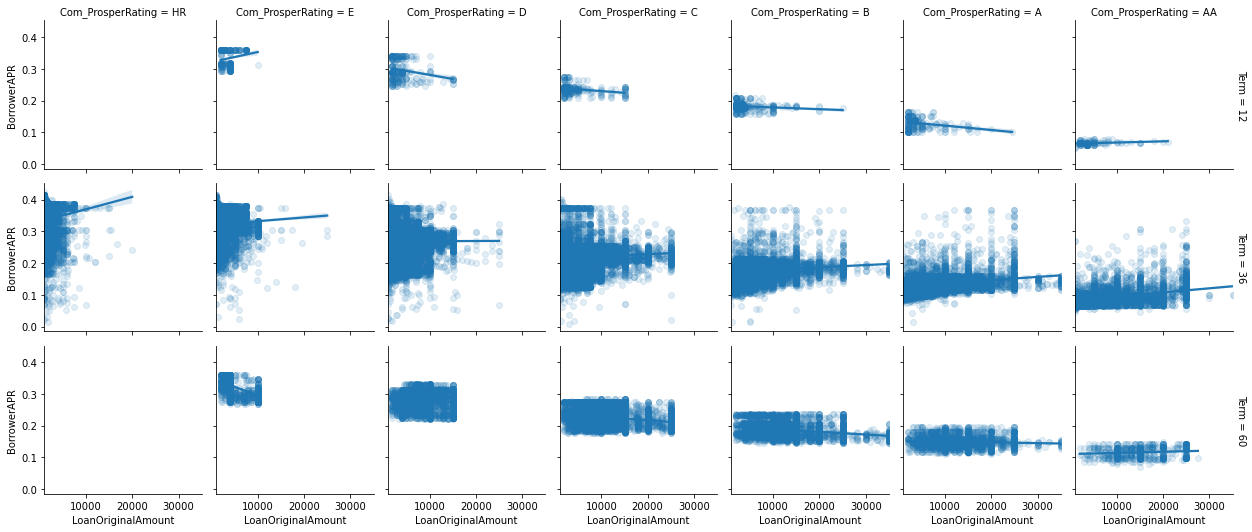

In [48]:
# Prosper rating and Term effect on relationship of APR and loan amount

g = sb.FacetGrid(data = loans_clean, col = 'Com_ProsperRating', row = 'Term', size = 2.5,
                margin_titles = True)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':1/8});

- Here are some important observations from above chart. First, Across every prosper rate the loan amount requested is lower for risky borrowers, the borrowers with excellent credit rating (AA) get the highest loan amount, otherwise The borrower APR increases with for risky borrowers. with a lower rating(HR, D) when people borrow more money APR rate increase, that happen  because they may find more difficulty to pay off when borrowing more. and increasing APR will prevent them from borrowing more. Likewise with a higher rating(A, AA), but the reason is different Because they borrow a lot, maybe more than normal, so it's better to increasing APR to prevent them from borrowing more. Next, it is interestng to note that Term doesn't  have effect on relationship of borower APR and loan amount.


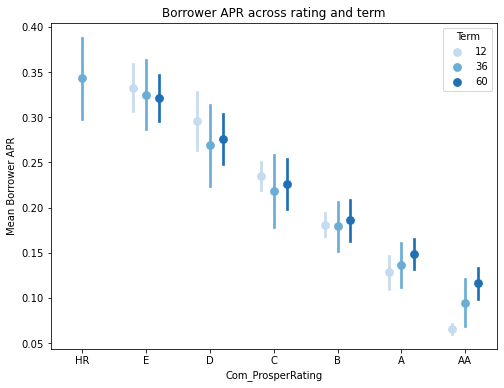

In [52]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans_clean, x = 'Com_ProsperRating', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Borrower APR')
ax.set_yticklabels([],minor = True);

- It looks interesting that the borrower APR increase with the decrease of term for people with (B, A, AA) raings. But for people with E rating, the APR decrease with the increase of term.

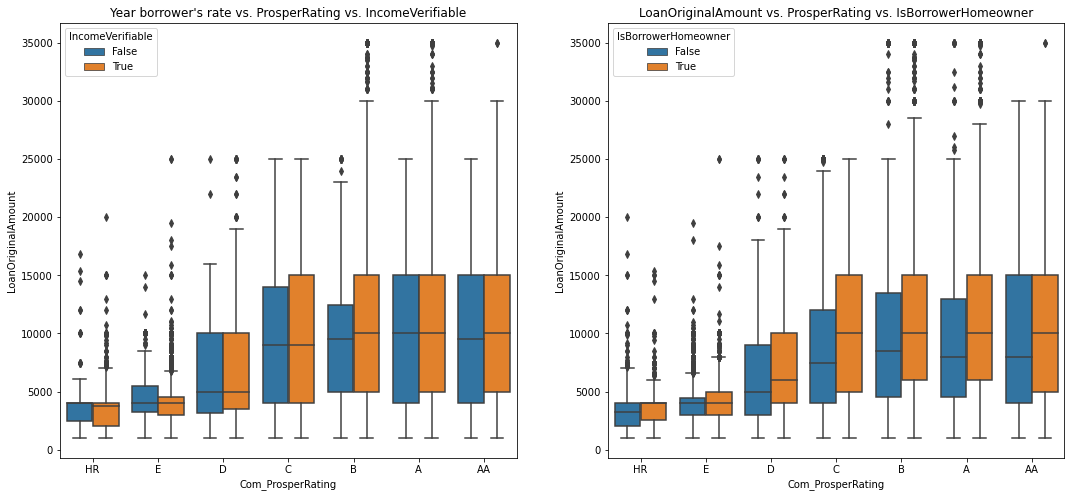

In [49]:
plt.figure(figsize=[18, 8]);

ax = plt.subplot(1, 2, 1)
sb.boxplot(data = loans_clean, x = 'Com_ProsperRating', y = 'LoanOriginalAmount', hue = 'IncomeVerifiable');
plt.title('Year borrower\'s rate vs. ProsperRating vs. IncomeVerifiable');

ax = plt.subplot(1, 2, 2)
sb.boxplot(data = loans_clean, x = 'Com_ProsperRating', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner');
plt.title('LoanOriginalAmount vs. ProsperRating vs. IsBorrowerHomeowner');

- From above graph. I notice that having  income verifiable helps to have a lower APR. Evenly, to be a homeowner is helpful in order to get a higher loan amount, which is not surprising since higher incomes are more likely to have a home, and a higher prosper score.

look at APR rating and term effects on Available Bank Credit card and loan original amount variables

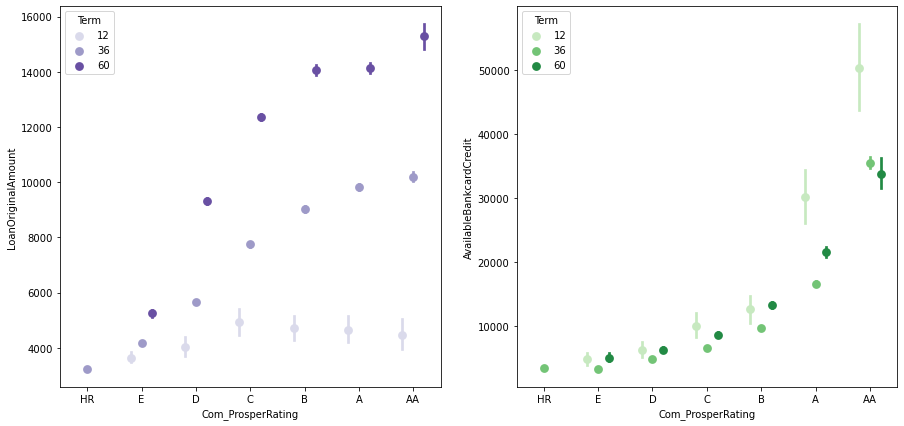

In [50]:
fig, ax= plt.subplots(ncols=2, figsize=[15,7])
sb.pointplot(data= loans_clean, x = 'Com_ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
          palette= 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data= loans_clean, x = 'Com_ProsperRating', y = 'AvailableBankcardCredit', hue = 'Term',
          palette= 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

- By looking at left graph of loan amount, there is an interaction between term and rating.and interaction incresess with better Prosper ratingthe loan amount of all three terms increases, The distance between the three terms increases with increasing prosper rating. But for Available credit card there is no an interaction  between term and rating the pattern seem similar among different ratings.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of borrower APR against loan amount in this section by looking at the impact of the Prosper rating and term. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from positive to negative from HR to B then Prosper ratings increased from B to AA.

### Were there any interesting or surprising interactions between features?

>  The borrower APR increase with the decrease of term for people with (B, A, AA) raings. But for people with E rating, the APR decrease with the increase of term.
